## Lead Scoring - Case Study
### Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goal:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Importing Libraries

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

### Inspecting the Dataframe

In [3]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking shape of Dataset
leads_df.shape

(9240, 37)

In [5]:
#Statistical view of Dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Here, we can see the presence of few categorical values for which we have to create dummy variables. Also, Null values have been seen Hence removing it

In [7]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

#### No duplicate values exist in 'Prospect ID' and 'Lead Number'

## Exploratory Data Analysis

### Data Cleaning

#### Identifying Missing Values

In [9]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

#### here are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [10]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [11]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### there are many columns with high percentage of null values, dropping it as they are not useful

### Dropping Columns with Missing Values >=35%

In [13]:
#Drop all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [14]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Categorical Attributes Analysis: 
 

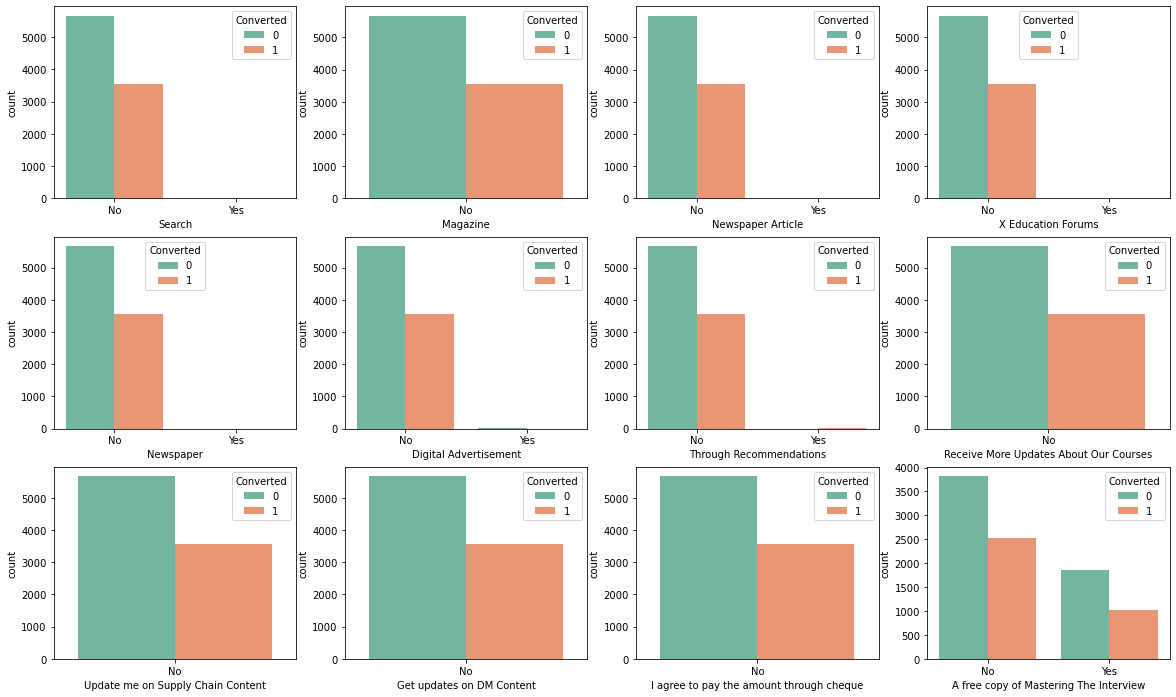

In [15]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3],palette = 'Set2')
plt.show()

#### Inference 
For all these columns  except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
"A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [17]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

### Lead Source

In [18]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [19]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')


In [20]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

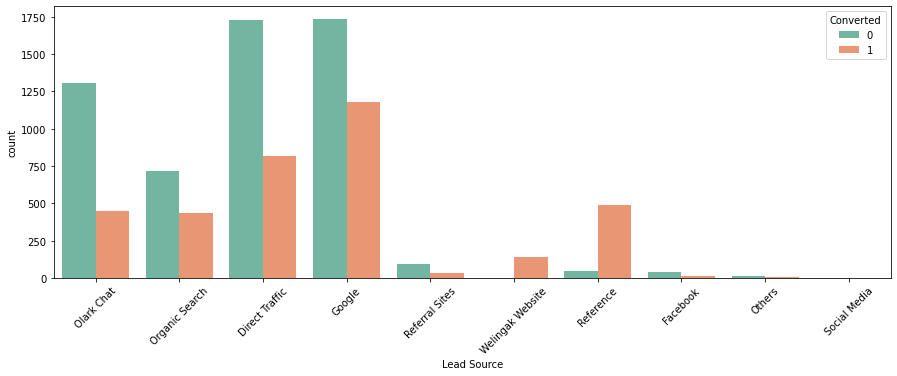

In [21]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Maximum Leads are generated by Google and Direct Traffic.
Conversion rate of Reference leads and Welinkgak Website leads is very high.
     

In [22]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Since, missing values are very high , we can impute all missing values with  value 'not provided'


In [23]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

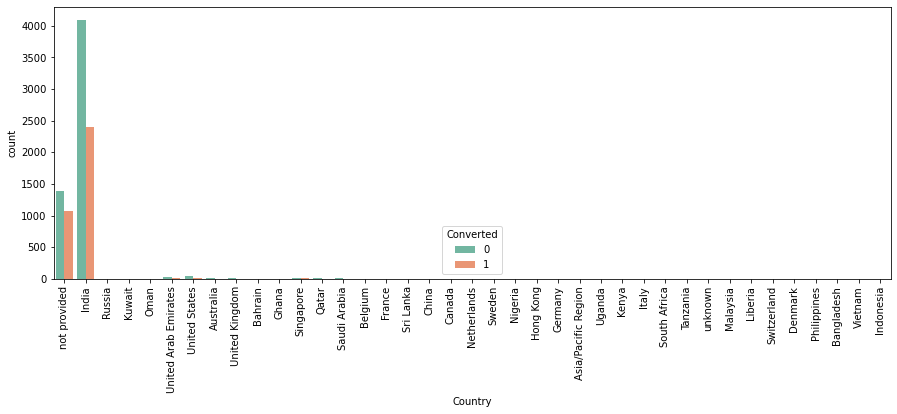

In [24]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [25]:
#creating a list of columns to be droppped
cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [26]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

####  Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided' 


In [27]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

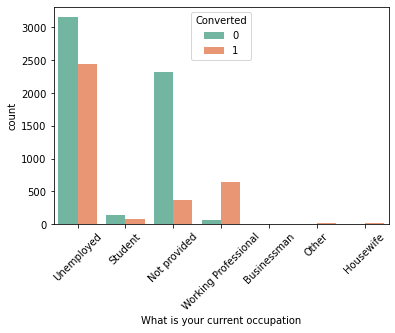

In [28]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


Maximum leads generated are unemployed and their conversion rate is more than 50%.
Conversion rate of working professionals is very high.

In [29]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### missing values in the this column can be imputed by 'Better Career Prospects'

In [30]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

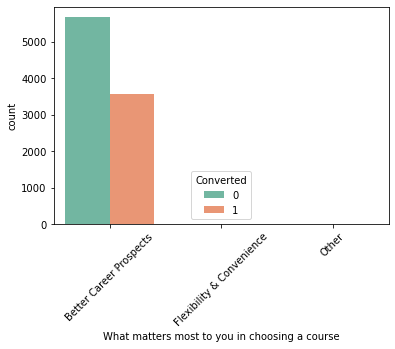

In [32]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

This column spread of variance is very low , hence it can be dropped.


In [33]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [34]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Missing values can be imputed with mode value "Email Opened"

In [35]:
#replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')


In [36]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

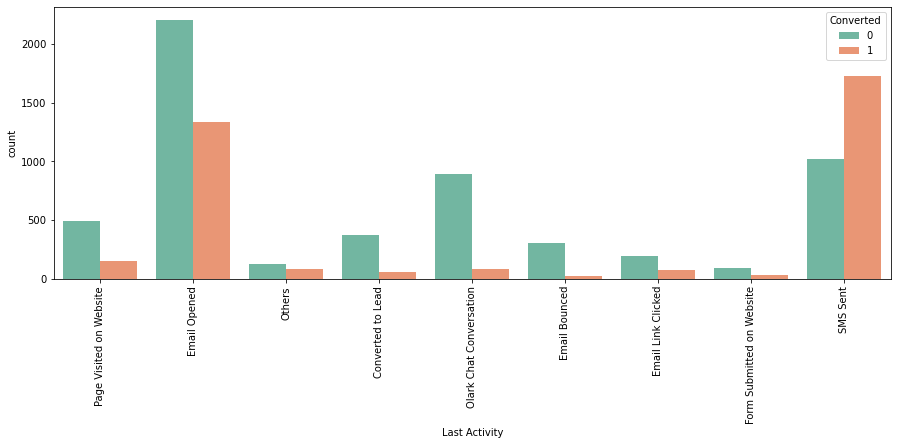

In [37]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Maximum leads are generated having last activity as Email opened but conversion rate is not too good. SMS sent as last acitivity has high conversion rate.

In [38]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [39]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [40]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [41]:
leads_df.shape

(9103, 25)

In [42]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Lead Origin

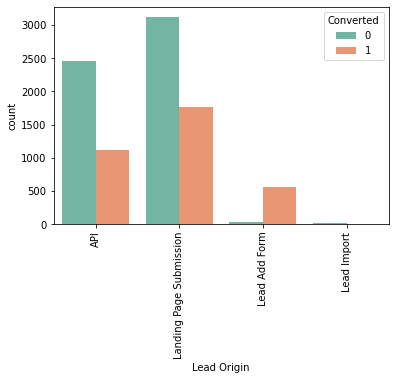

In [43]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

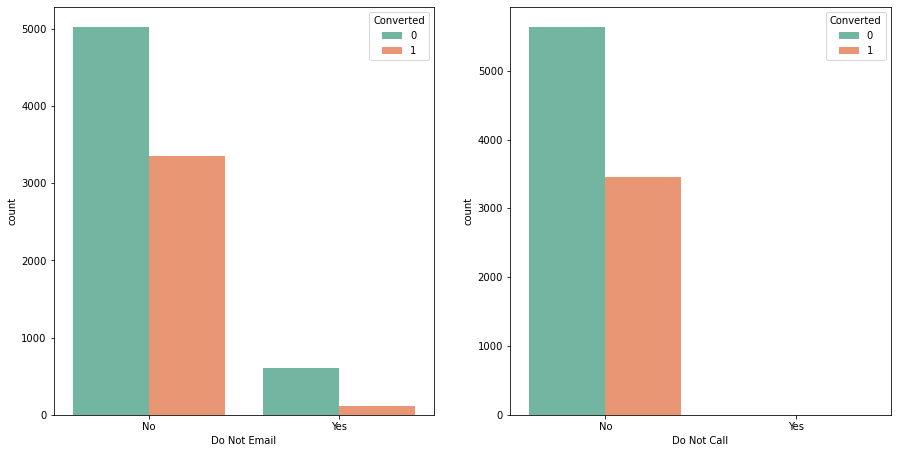

In [44]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set2')
plt.show()

#### We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [45]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [46]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

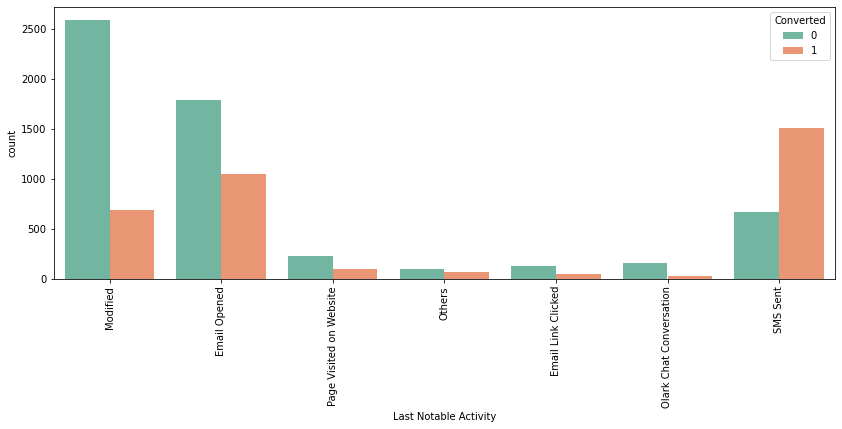

In [48]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.SMS sent as last acitivity has high conversion rate.

In [49]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [50]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [51]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 898.1+ KB


In [52]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


## Numerical Attributes Analysis:

#### Converted

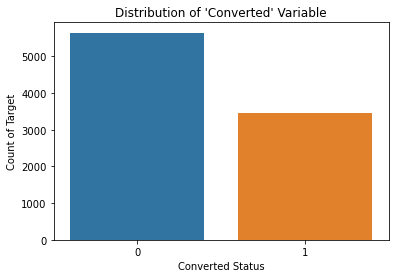

In [53]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable

sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [54]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

#### Currently, lead Conversion rate is 38% only 

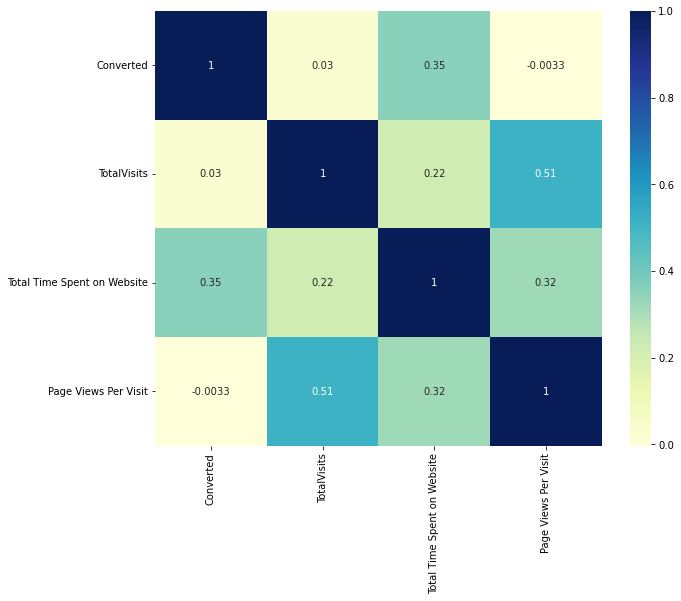

In [55]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

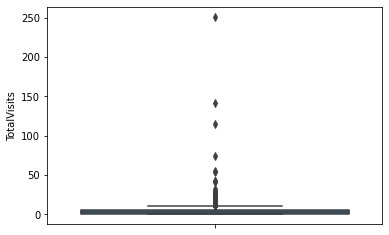

In [56]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

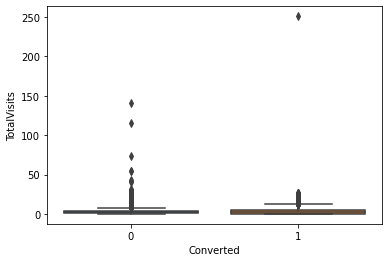

In [57]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Presence of outliers can be seen clearly

In [58]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

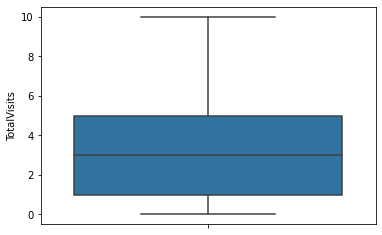

In [59]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

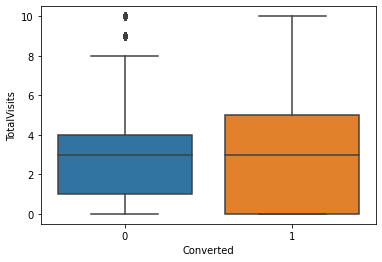

In [60]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [61]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

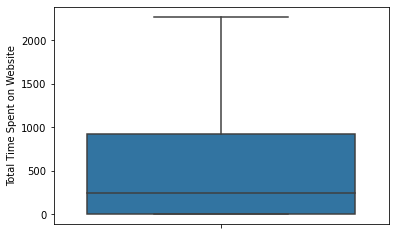

In [62]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

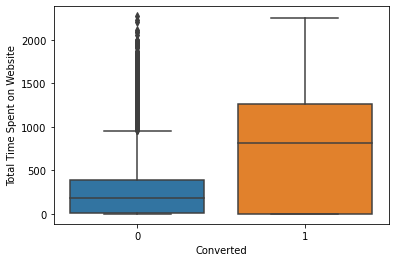

In [63]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

In [64]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

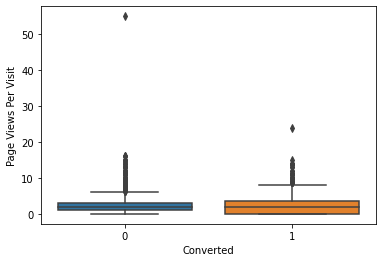

In [65]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

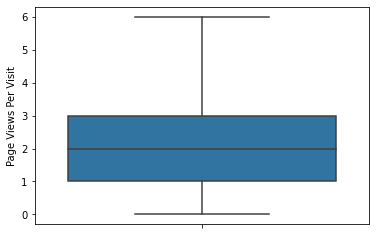

In [66]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

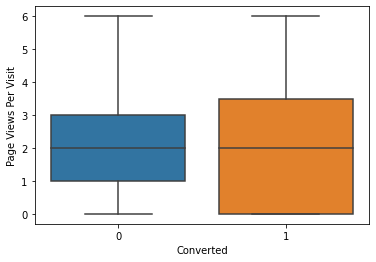

In [67]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

Median for converted and not converted leads is almost same. Nothing conclusive can be said on the basis of Page Views Per Visit.

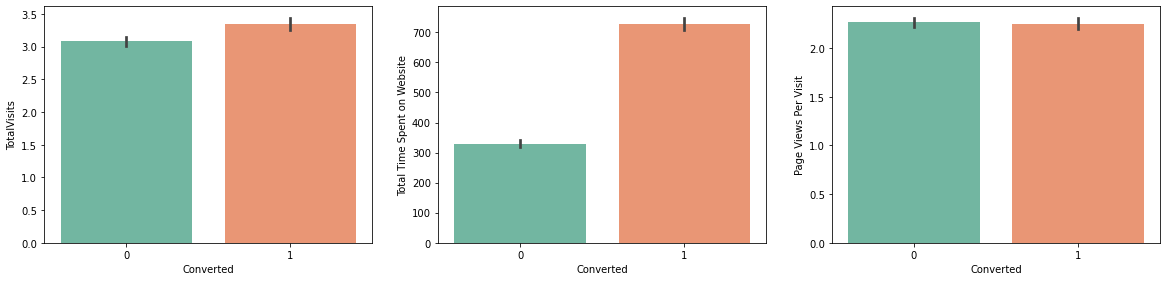

In [68]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

## Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [69]:
# List of variables to map

varlist= ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [70]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [71]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 898.1+ KB


### Dummy Variable Creation

In [72]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [73]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)


In [74]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [75]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Test-Train Split

In [76]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [77]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [80]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [81]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

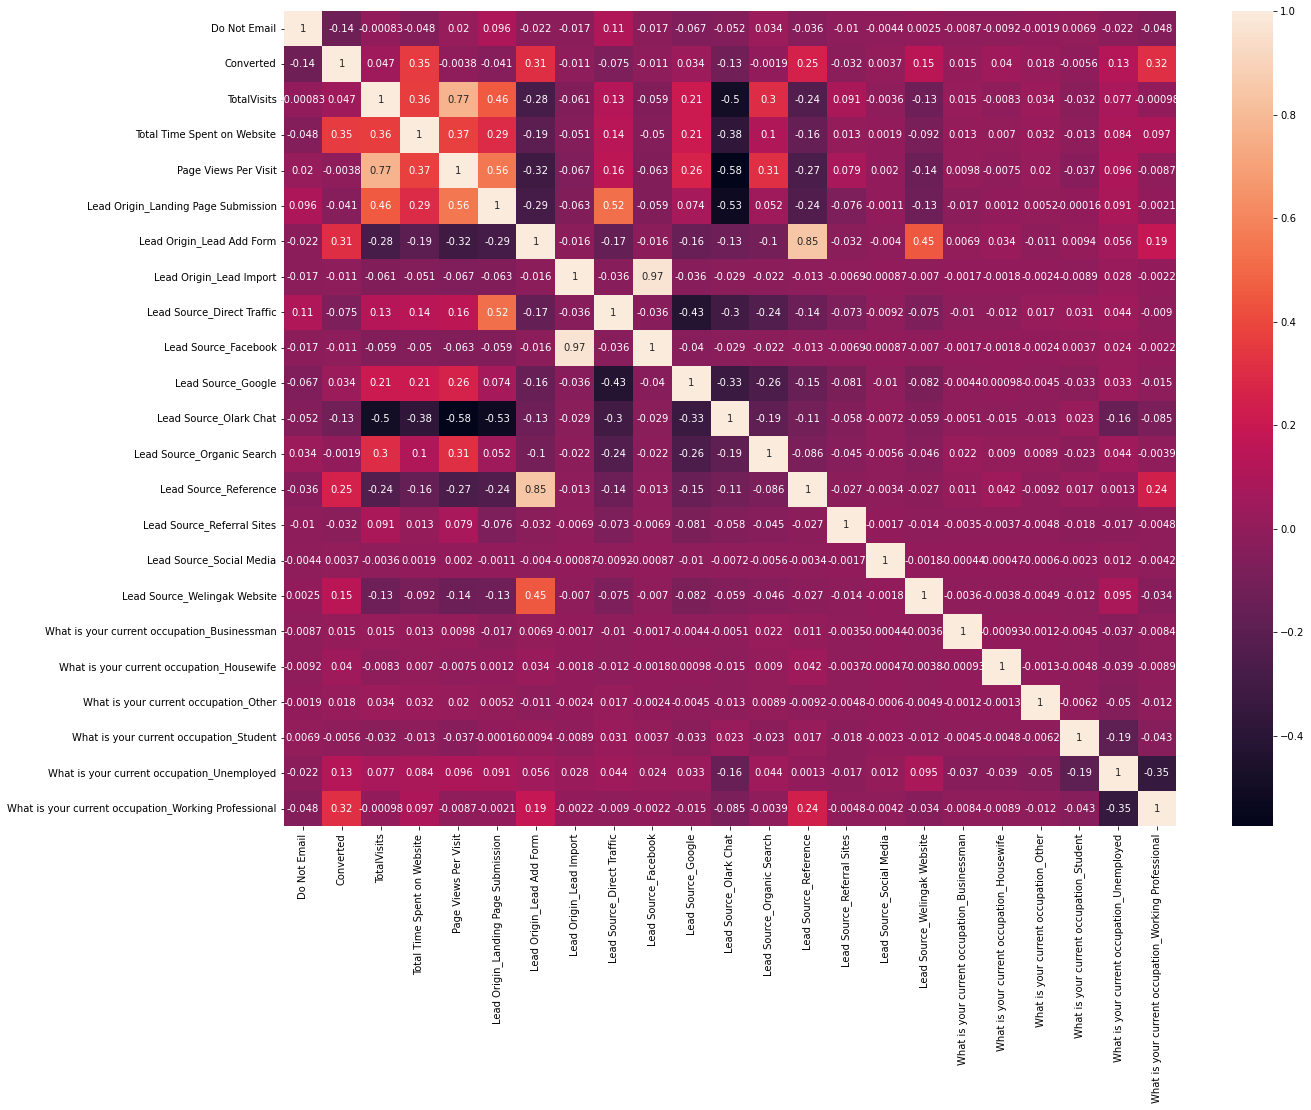

In [83]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()


### Dropping highly correlated dummy variables

In [84]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [85]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## Model Building using Stats Model & RFE

In [86]:
# importing necessary library
import statsmodels.api as sm


In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [92]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

## Model 1

In [95]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Wed, 04 Jan 2023   Deviance:                       5725.6
Time:                        19:21:59   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

#### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [96]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

## Model 2

In [97]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Wed, 04 Jan 2023   Deviance:                       5744.6
Time:                        19:22:38   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

<b>p-value of variable "Lead Source_Welingak Website" is high, so we will drop it.

In [98]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

## Model 3

In [99]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Wed, 04 Jan 2023   Deviance:                       5745.1
Time:                        19:23:02   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

<b>variable 'What is your current occupation_Businessman' has high p-value, so it needs to be dropped

In [100]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

## Model 4

In [101]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Wed, 04 Jan 2023   Deviance:                       5747.1
Time:                        19:23:24   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2155      0.095    -12.809      0.000      -1.401      -1.030
Do Not Email                                            -0.3610      0.043     -8.360      0.000      -0.446      -0.276
Total Time Spent on Website                              1.1004      0.038     28.661      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6094      0.523      8.810      0.000       3.584       5.635
Lead Source_Direct Traffic                              -1.0547      0.107     -9.823      0.000      -1.265      -0.844
Lead Source_Google                                      -0.7815      0.103     -7.622      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8655      0.124     -7.003      0.000      -1.108      -0.623
Lead Source_Reference                                   -1.7436      0.564     -3.091      0.002      -2.849      -0.638
Lead Source_Referral Sites                              -1.3729      0.336     -4.087      0.000      -2.031      -0.715
What is your current occupation_Other                    1.3254      0.641      2.069      0.039       0.070       2.581
What is your current occupation_Student                  1.1497      0.224      5.122      0.000       0.710       1.590
What is your current occupation_Unemployed               1.2770      0.083     15.469      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7733      0.189     19.975      0.000       3.403       4.143
========================================================================================================================
"""

In [102]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

## Model 5

In [103]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.6
Date:                Wed, 04 Jan 2023   Deviance:                       5751.2
Time:                        19:23:44   Pearson chi2:                 6.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2020      0.094    -12.723      0.000      -1.387      -1.017
Do Not Email                                            -0.3600      0.043     -8.348      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1023      0.038     28.710      0.000       1.027       1.178
Lead Origin_Lead Add Form                                4.6119      0.523      8.816      0.000       3.587       5.637
Lead Source_Direct Traffic                              -1.0496      0.107     -9.783      0.000      -1.260      -0.839
Lead Source_Google                                      -0.7804      0.102     -7.615      0.000      -0.981      -0.580
Lead Source_Organic Search                              -0.8639      0.124     -6.987      0.000      -1.106      -0.622
Lead Source_Reference                                   -1.7425      0.564     -3.089      0.002      -2.848      -0.637
Lead Source_Referral Sites                              -1.3749      0.336     -4.094      0.000      -2.033      -0.717
What is your current occupation_Student                  1.1342      0.224      5.057      0.000       0.695       1.574
What is your current occupation_Unemployed               1.2613      0.082     15.384      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7575      0.189     19.919      0.000       3.388       4.127
========================================================================================================================
"""

### Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

## Calculating VIF

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
9,What is your current occupation_Unemployed,2.58
4,Lead Source_Google,1.70
3,Lead Source_Direct Traffic,1.67
5,Lead Source_Organic Search,1.31
10,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
8,What is your current occupation_Student,1.05
0,Do Not Email,1.03


<b>All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Predicting a Train model

In [105]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733427
5520    0.150019
1962    0.223565
1566    0.968245
9170    0.308725
5097    0.112311
8954    0.254701
309     0.258253
5519    0.112311
1050    0.648854
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73342692, 0.15001897, 0.22356515, 0.96824499, 0.30872547,
       0.11231116, 0.25470142, 0.25825332, 0.11231116, 0.64885439])

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733427,7962
1,0,0.150019,5520
2,0,0.223565,1962
3,1,0.968245,1566
4,0,0.308725,9170


In [108]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733427,7962,1
1,0,0.150019,5520,0
2,0,0.223565,1962,0
3,1,0.968245,1566,1
4,0,0.308725,9170,0


### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [109]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3550  403]
 [ 849 1570]]


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8035153797865662


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Calculating Sensitivity
TP / float(TP+FN)

0.649028524183547

In [116]:
# Calculating Specificity
TN / float(TN+FP)

0.8980521123197571

In [117]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10194788768024285


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.7957425240750127


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8070015912707433


## PLOTTING ROC CURVE

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


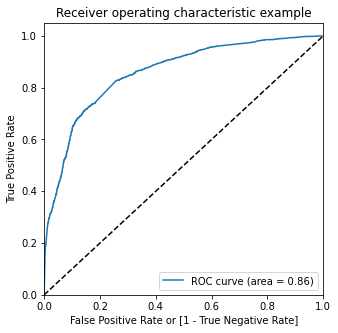

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<B>The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.</B>

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [123]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0


In [124]:
# Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515694  0.981811  0.230458
0.2   0.2  0.690521  0.906573  0.558310
0.3   0.3  0.770559  0.828855  0.734885
0.4   0.4  0.801946  0.700703  0.863901
0.5   0.5  0.803515  0.649029  0.898052
0.6   0.6  0.780917  0.560976  0.915507
0.7   0.7  0.759102  0.466308  0.938275
0.8   0.8  0.733992  0.353865  0.966608
0.9   0.9  0.690207  0.192642  0.994688


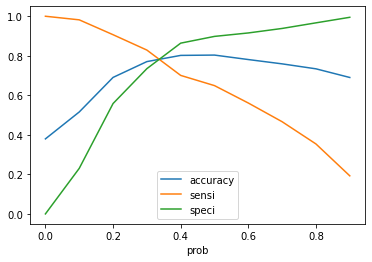

In [125]:
# Calculating Accuracy, Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [126]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [127]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733427,7962,1,73
1,0,0.150019,5520,0,15
2,0,0.223565,1962,0,22
3,1,0.968245,1566,1,97
4,0,0.308725,9170,1,31


In [128]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2005
0     414
Name: final_Predicted, dtype: int64

In [129]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

### <font color = maroon>Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [130]:
# Checking Overall Accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7705586942875079

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Calculating Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8288548987184787

In [134]:
# Calculating Specificity
TN / float(TN+FP)

0.7348848975461675

<b><font size=3>Inference:</font></b><br>
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:
<ul>
    <li>Accuracy : 77.05%</li>
    <li>Sensitivity :82.89%</li>
    <li>Specificity : 73.49%</li></ul>
    
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [135]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2651151024538325


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6567310841794956


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752636336245857


## Precision and Recall

In [138]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [139]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6567310841794956

In [140]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8288548987184787

In [141]:
from sklearn.metrics import precision_score, recall_score

In [142]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6567310841794956

In [143]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8288548987184787

## Precision and Recall Trade-off

In [144]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [145]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

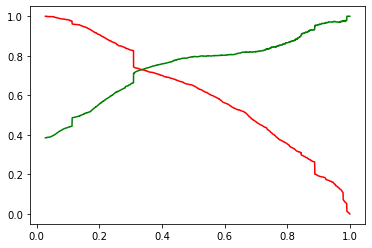

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on  the test set

In [147]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [148]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,1,0


In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
X_test_sm.shape

(2731, 12)

In [151]:
y_test_pred = res.predict(X_test_sm)    

In [152]:
y_test_pred[:10]

3504    0.306096
4050    0.886499
7201    0.147829
1196    0.305665
8219    0.203766
8747    0.111534
9048    0.319527
6524    0.223440
7693    0.052311
8187    0.886499
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [154]:
# Let's see the head
y_pred_1.head()

,0
3504,0.306096
4050,0.886499
7201,0.147829
1196,0.305665
8219,0.203766


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


In [160]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [161]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


#### Assigning Lead Score

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.306096,31
1,4050,1,0.886499,89
2,7201,0,0.147829,15
3,1196,0,0.305665,31
4,8219,1,0.203766,20


In [164]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.306096,31,1
1,4050,1,0.886499,89,1
2,7201,0,0.147829,15,0
3,1196,0,0.305665,31,1
4,8219,1,0.203766,20,0


In [166]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    865
0    177
Name: final_Predicted, dtype: int64

In [167]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### <font color = maroon>Hence we can see that the final prediction of conversions have a target rate of 83%  (same as predictions made on training data set)

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1252,  437],
       [ 177,  865]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8301343570057581

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.7412670219064535

### Precision and Recall metrics for the test set

In [173]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6643625192012289

In [174]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8301343570057581

<b><font size=3>Inference:</font></b><br>
After running the model on the Test Data these are the figures we obtain:
<ul>
<li>Accuracy : 77.52%</li>
<li>Sensitivity :83.01%</li>
<li>Specificity : 74.13%</li>

<b><font size =4>Conclusion:</font></b>


- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   

<b>Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :</b>
<li>Lead Origin_Lead Add Form</li>
<li>What is your current occupation_Working Professional</li>
<li>Total Time Spent on Website	</li>